# Importing Libraries

In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Convolution2D as Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

# Loading Data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the data

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train[0]

5

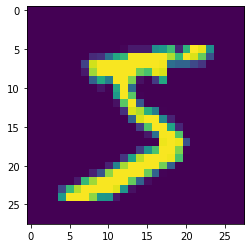

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

#Reshaping the data 

In [6]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

# One-hot Encoding

In [7]:
num_of_classes = 10
y_train = np_utils.to_categorical(y_train,num_of_classes)
y_test = np_utils.to_categorical(y_test,num_of_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

# Creating Model (Add CNN Layers)

In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(num_of_classes,activation='softmax'))

# Compiling the model

In [10]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

# Fitting the model

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2578 - accuracy: 0.9482 - val_loss: 0.1180 - val_accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0778 - accuracy: 0.9769 - val_loss: 0.0907 - val_accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0921 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.1090 - val_accuracy: 0.9707
Epoch 5/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.1161 - val_accuracy: 0.9731


# Observing the metrics

In [28]:
project_metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Loss& Accuracy)")
print(project_metrics)

Metrics(Loss& Accuracy)
[0.11606404930353165, 0.9731000065803528]


In [27]:
import sklearn.metrics as metrics
import numpy as np 
import matplotlib.pyplot as plt

y_predict = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_predict)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
 


313/313 [==============================] - 5s 17ms/step
Results of sklearn.metrics:
MAE: 0.005652044
MSE: 0.004229254
RMSE: 0.06503271
R-Squared: 0.9529207866394055


In [32]:
y_predict = (y_predict>0.5)
print("classification report")
print(metrics.classification_report(y_test, y_predict))
print("accuracy score:")
print(metrics.accuracy_score(y_test, y_predict))
##print(metrics.confusion_matrix(y_test, y_predict))

classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.97      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000

accuracy score:
0.9727


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting the model

In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 66ms/step
[[5.4520988e-12 1.0888041e-21 7.5880036e-13 1.2055289e-11 2.6268963e-19
  3.1448650e-15 1.1666435e-19 1.0000000e+00 2.1508427e-11 2.9282635e-11]
 [4.4279619e-12 1.2889054e-12 1.0000000e+00 2.0362232e-17 5.6934279e-20
  5.3493605e-19 4.8295710e-13 5.0981827e-21 1.0086084e-15 1.9516000e-19]
 [9.2632938e-08 9.9921167e-01 6.2528164e-07 4.8549702e-11 7.8550651e-04
  1.5237079e-07 6.6308399e-09 1.0095750e-09 1.9272488e-06 1.2933888e-12]
 [1.0000000e+00 1.6884626e-16 2.7246841e-10 5.4617701e-15 1.6128288e-14
  1.5063359e-10 5.7584715e-10 9.0131895e-14 7.9959858e-11 2.1980879e-08]]


In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Loss& Accuracy)")
print(metrics)

Metrics(Loss& Accuracy)
[0.09232578426599503, 0.9797999858856201]


In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 48ms/step
[[5.4520988e-12 1.0888041e-21 7.5880036e-13 1.2055289e-11 2.6268963e-19
  3.1448650e-15 1.1666435e-19 1.0000000e+00 2.1508427e-11 2.9282635e-11]
 [4.4279619e-12 1.2889054e-12 1.0000000e+00 2.0362232e-17 5.6934279e-20
  5.3493605e-19 4.8295710e-13 5.0981827e-21 1.0086084e-15 1.9516000e-19]
 [9.2632938e-08 9.9921167e-01 6.2528164e-07 4.8549702e-11 7.8550651e-04
  1.5237079e-07 6.6308399e-09 1.0095750e-09 1.9272488e-06 1.2933888e-12]
 [1.0000000e+00 1.6884626e-16 2.7246841e-10 5.4617701e-15 1.6128288e-14
  1.5063359e-10 5.7584715e-10 9.0131895e-14 7.9959858e-11 2.1980879e-08]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Saving the model

In [ ]:
model.save('models/mnistCNN.h5')